In [1]:
import pandas as pd
import numpy as np  
import scipy as sp


allergyData = pd.read_csv('data/food-allergy-analysis-Zenodo.csv')

print(len(allergyData))

333200


In [2]:
cleanedAllergyData = allergyData.drop(columns=['SUBJECT_ID', 'BIRTH_YEAR'])
#cleanedAllergyData.head(200)

In [3]:
import matplotlib.pyplot as plt

from scipy.stats import skew 
import seaborn as sns
# Use matplotlib and scipy to describe the statistical data and skewness of column, temp is used to reduce the amount of column name repetition



#Get all numerical attributes
allNumericalData = cleanedAllergyData.drop(columns=['GENDER_FACTOR','RACE_FACTOR','PAYER_FACTOR','ETHNICITY_FACTOR','ATOPIC_MARCH_COHORT'])
replaceMinus = allNumericalData[allNumericalData >= 0]
handleOutliers = replaceMinus[replaceMinus < 20]
handleOutliers['GENDER_FACTOR'] = cleanedAllergyData['GENDER_FACTOR']
handleOutliers['RACE_FACTOR'] = cleanedAllergyData['RACE_FACTOR']
handleOutliers['PAYER_FACTOR'] = cleanedAllergyData['PAYER_FACTOR']
handleOutliers['ATOPIC_MARCH_COHORT'] = cleanedAllergyData['ATOPIC_MARCH_COHORT']
#

AllergenData = handleOutliers
#Better naming
AllergenData['ASTHMA_RX'] = AllergenData['FIRST_ASTHMARX'].notna().astype(int)
EndColumns = [col for col in AllergenData if col.endswith('END')]
AllergenData['PATIENT_CURED'] = AllergenData[EndColumns].notna().any(axis=1).astype(int)


print(len(AllergenData))

333200


In [ ]:
from scipy.stats import skew 
import seaborn as sns

numericalStats = AllergenData.describe()

skewness = allNumericalData.skew()


print(numericalStats)

       AGE_START_YEARS  AGE_END_YEARS  SHELLFISH_ALG_START  SHELLFISH_ALG_END  \
count    333200.000000  333200.000000          5220.000000        1051.000000   
mean          3.942466      10.336654             8.663500           6.431159   
std           4.646016       5.623426             5.215326           4.475387   
min           0.000000       1.002053             0.093087           0.169747   
25%           0.021903       5.289528             3.943874           2.620123   
50%           1.765914      10.193018             8.320329           5.305955   
75%           7.208761      15.616701            13.012320           9.609856   
max          17.984942      18.997947            19.986311          18.778919   

       FISH_ALG_START  FISH_ALG_END  MILK_ALG_START  MILK_ALG_END  \
count     1792.000000    527.000000     7280.000000   4575.000000   
mean         6.597009      5.337775        3.291225      2.477826   
std          4.975629      4.190826        4.010688      3.1068

In [ ]:
#USE to compare allergy end attribute with first_ASTHMARX

#All of the nut allergens with first and last asthmarx
NutAllergies = handleOutliers.filter(regex='NUT|ASTHMARX|CASHEW|PISTACH|PECAN|ALMOND|BRAZIL|AGE|GENDER|RACE|PAYER')
NutColumns = [col for col in NutAllergies if 'NUT' in col.upper()]
NutAllergies = NutAllergies.dropna(subset=NutColumns,how='all')



#Egg
EggAllergies = handleOutliers.filter(regex='EGG|ASTHMARX|AGE|GENDER|RACE|PAYER')
EggColumns = [col for col in EggAllergies if 'EGG' in col.upper()]
EggAllergies = EggAllergies.dropna(subset=EggColumns)

#Wheat
WheatAllergies = handleOutliers.filter(regex='WHEAT|ASTHMARX|AGE|GENDER|RACE|PAYER')
WheatColumns = [col for col in WheatAllergies if 'WHEAT' in col.upper()]
WheatAllergies = WheatAllergies.dropna(subset=WheatColumns)


#SOY
SoyAllergies = handleOutliers.filter(regex='SOY|ASTHMARX|AGE|GENDER|RACE|PAYER')
SoyColumns = [col for col in SoyAllergies if 'SOY' in col.upper()]
SoyAllergies = SoyAllergies.dropna(subset=SoyColumns)


#MILK
MilkAllergies = handleOutliers.filter(regex='MILK|ASTHMARX|AGE|GENDER|RACE|PAYER')
MilkColumns = [col for col in MilkAllergies if 'MILK' in col.upper()]
MilkAllergies = MilkAllergies.dropna(subset=MilkColumns)


#FISH
FishAllergies = handleOutliers.filter(regex='FISH|ASTHMARX|AGE|GENDER|RACE|PAYER')
FishColumns = [col for col in FishAllergies if 'FISH' in col.upper()]
FishAllergies = FishAllergies.dropna(subset=FishColumns)


#ATOPIC
AtopicAllergies = handleOutliers.filter(regex='ATOPIC|ASTHMARX|AGE|GENDER|RACE|PAYER')
AtopicColumns = [col for col in AtopicAllergies if 'ATOPIC' in col.upper()]
AtopicAllergies = AtopicAllergies.dropna(subset=AtopicColumns)

#RHINITIS
RhinitisAllergies = handleOutliers.filter(regex='RHINITIS|ASTHMARX|AGE|GENDER|RACE|PAYER')
RhinitisColumns = [col for col in RhinitisAllergies if 'RIHNITIS' in col.upper()]
RhinitisAllergies = RhinitisAllergies.dropna(subset=RhinitisColumns)

#ASTHMA
AsthmaAllergies = handleOutliers.filter(regex='ASTHMA|ASTHMARX|AGE|GENDER|RACE|PAYER')
AsthmaColumns = [col for col in AsthmaAllergies if 'ASTHMA' in col.upper()]
AsthmaAllergies = AsthmaAllergies.dropna(subset=AsthmaColumns)



['SHELLFISH_ALG_START', 'SHELLFISH_ALG_END', 'FISH_ALG_START', 'FISH_ALG_END']
92


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [5]:

# Features to be used for prediction
features = ['PATIENT_CURED', 'RACE_FACTOR', 'GENDER_FACTOR', 'PAYER_FACTOR','AGE_START_YEARS','AGE_END_YEARS','ATOPIC_MARCH_COHORT']


AllergenData['AGE_START_YEARS'].fillna(AllergenData['AGE_START_YEARS'].mean(),inplace=True)
print(AllergenData[features].isna().sum())
#encode for catagorical features
X = pd.get_dummies(AllergenData[features])
y = AllergenData['ASTHMA_RX'] # Our target attribute

print(X.shape)
print(y.shape)


# Train/test split
# First split: 80% train, 20% test
X_model, X_test, y_model, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Second split: 75% train, 25% validation (of the 80% train data)
X_train, X_val, y_train, y_val = train_test_split(X_model, y_model, test_size=0.25, random_state=42)

#Handle class imbalance with SMOTE, same random_state for testing.
smote = SMOTE(random_state=42)
X_train_resample, y_train_resample = smote.fit_resample(X_train, y_train)

C:\Users\darkl\AppData\Local\Temp\ipykernel_20792\2146679217.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  AllergenData['AGE_START_YEARS'].fillna(AllergenData['AGE_START_YEARS'].mean(),inplace=True)


PATIENT_CURED          0
RACE_FACTOR            0
GENDER_FACTOR          0
PAYER_FACTOR           0
AGE_START_YEARS        0
AGE_END_YEARS          0
ATOPIC_MARCH_COHORT    0
dtype: int64
(333200, 13)
(333200,)


In [19]:
X.head(2)

,PATIENT_CURED,AGE_START_YEARS,AGE_END_YEARS,RACE_FACTOR_R0 - White,RACE_FACTOR_R1 - Black,RACE_FACTOR_R2 - Asian or Pacific Islander,RACE_FACTOR_R3 - Other,RACE_FACTOR_R4 - Unknown,GENDER_FACTOR_S0 - Male,GENDER_FACTOR_S1 - Female,PAYER_FACTOR_P0 - Non-Medicaid,PAYER_FACTOR_P1 - Medicaid
8,1,0.019165,6.726899,True,False,False,False,False,True,False,True,False
65,0,0.008214,6.792608,False,True,False,False,False,False,True,True,False


True


In [6]:

#Use class weights so model to overbias the majority class.



#Fit the model to the training data
#Then make predictions based on the test set
# Done for each of our considered models

rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train_resample, y_train_resample)
y_pred_rf = rf_model.predict(X_test)


gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_resample, y_train_resample)
y_pred_gb = gb_model.predict(X_test)


log_reg_model = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)
log_reg_model.fit(X_train_resample, y_train_resample)
y_pred_log_reg = log_reg_model.predict(X_test)



from sklearn.metrics import classification_report, confusion_matrix

#Print classification report and confusion matrix of our test models

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))

print("Gradient Boosting Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))


print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.70      0.71     43144
           1       0.47      0.50      0.48     23496

    accuracy                           0.63     66640
   macro avg       0.60      0.60      0.60     66640
weighted avg       0.63      0.63      0.63     66640

Random Forest Confusion Matrix:
[[30154 12990]
 [11828 11668]]
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.79      0.77     43144
           1       0.56      0.51      0.53     23496

    accuracy                           0.69     66640
   macro avg       0.65      0.65      0.65     66640
weighted avg       0.68      0.69      0.68     66640

Gradient Boosting Confusion Matrix:
[[33938  9206]
 [11624 11872]]
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.74      0

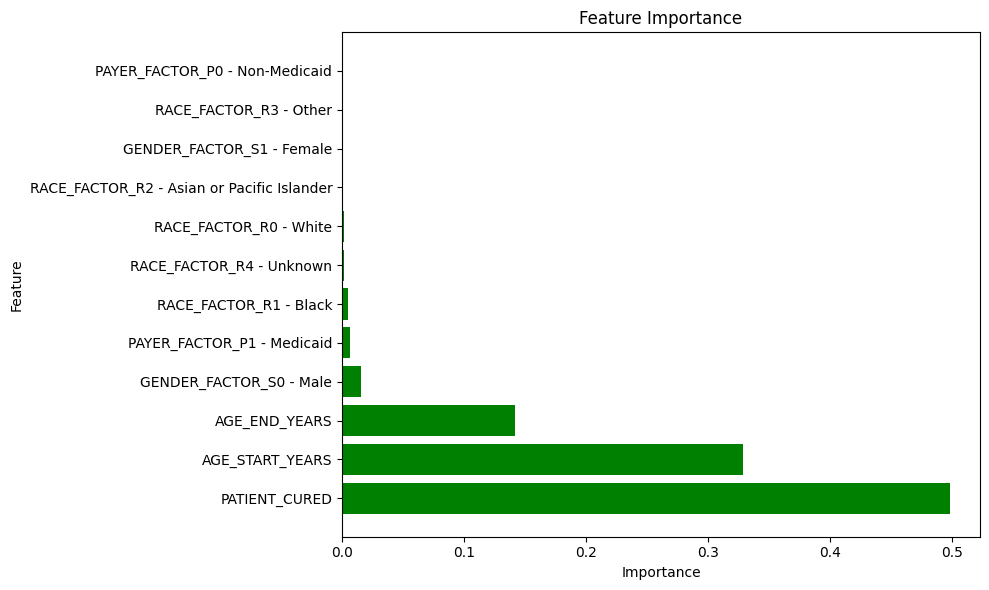

In [ ]:


importantFeatures = gb_model.feature_importances_
featureNames = X_train_resample.columns

#Data frame just for the feature names and how "important" each feature was for the model
importanceDF = pd.DataFrame({
    'Feature': featureNames,
    'Importance': importantFeatures
}).sort_values(by='Importance',ascending=True)


plt.figure(figsize=(10, 6))
plt.barh(importanceDF['Feature'], importanceDF['Importance'], color='green')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.tight_layout()
plt.show()

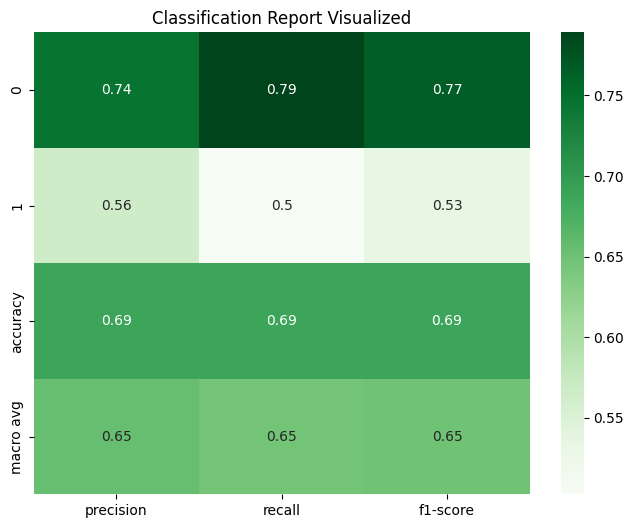

In [12]:
report = classification_report(y_test, y_pred_gb, output_dict=True)

df_report = pd.DataFrame(report).transpose()


plt.figure(figsize=(8, 6))
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap='Greens')
plt.title('Classification Report Visualized')
plt.show()


In [13]:
import joblib

joblib.dump(gb_model,'gradBoostModelAllergen.pkl')

['gradBoostModelAllergen.pkl']

In [ ]:
#Discretize Data
## Create sub models of the above allergen datasets to model them within "buckets", 
# I believe it would be useful to separate data into age ranges.
# IE 0-5, 5-9, 9-13, 13-17 and so on. Perhaps

#Toddler = 0-5

#Child = 5-9
#YoungTeen = 10-12
# Adult = 13 - 17

labels = ['Toddler','Child','Pre-Teen','Teenager']

AllergenData['Age_Group'] = pd.cut(AllergenData['AGE_START_YEARS'],bins=[0,5,9,13,18],labels= labels, right=False)

NutAllergies['Age_Group'] = pd.cut(NutAllergies['AGE_START_YEARS'],bins=[0,5,9,13,18],labels=labels,right=False)

EggAllergies['Age_Group'] = pd.cut(EggAllergies['AGE_START_YEARS'],bins=[0,5,9,13,18],labels=labels,right=False)

WheatAllergies['Age_Group'] = pd.cut(WheatAllergies['AGE_START_YEARS'],bins=[0,5,9,13,18],labels=labels,right=False)

SoyAllergies['Age_Group'] = pd.cut(SoyAllergies['AGE_START_YEARS'],bins=[0,5,9,13,18],labels=labels,right=False)

MilkAllergies['Age_Group'] = pd.cut(MilkAllergies['AGE_START_YEARS'],bins=[0,5,9,13,18],labels=labels,right=False)

FishAllergies['Age_Group'] = pd.cut(FishAllergies['AGE_START_YEARS'],bins=[0,5,9,13,18],labels=labels,right=False)

AtopicAllergies['Age_Group'] = pd.cut(AtopicAllergies['AGE_START_YEARS'],bins=[0,5,9,13,18],labels=labels,right=False)

RhinitisAllergies['Age_Group'] = pd.cut(RhinitisAllergies['AGE_START_YEARS'],bins=[0,5,9,13,18],labels=labels,right=False)

AsthmaAllergies['Age_Group'] = pd.cut(AsthmaAllergies['AGE_START_YEARS'],bins=[0,5,9,13,18],labels=labels,right=False)



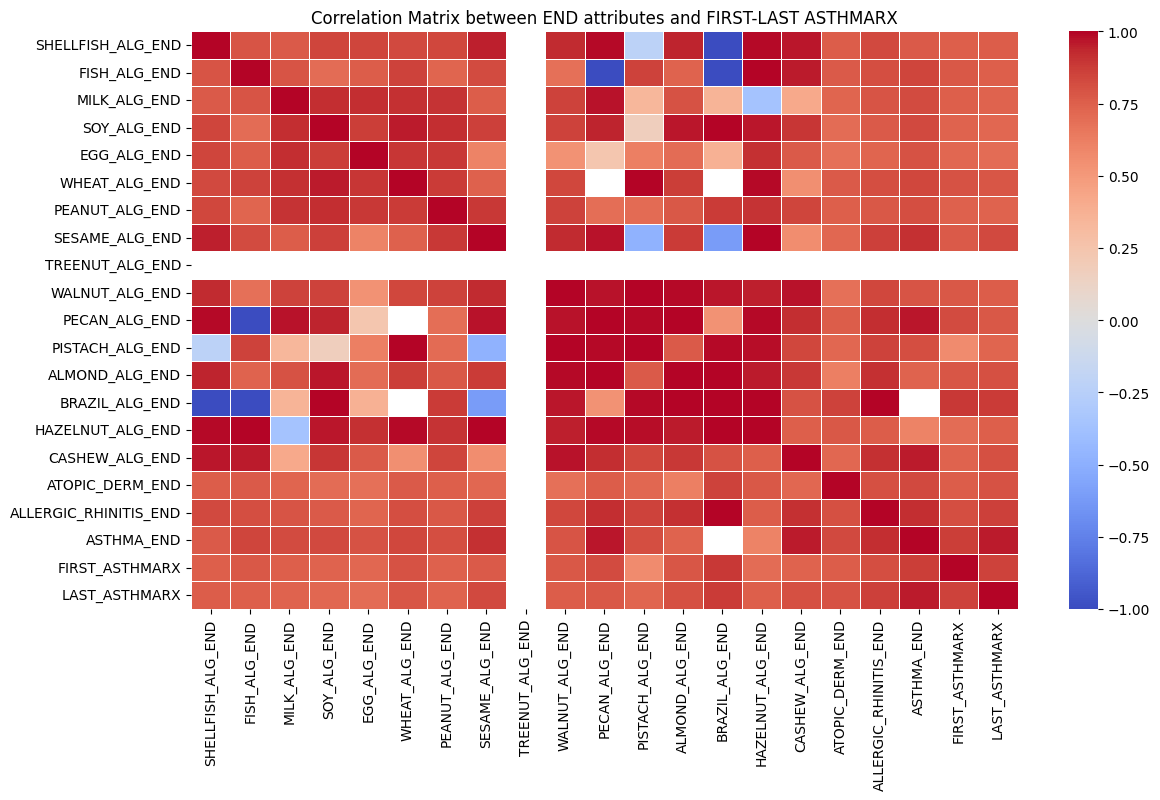

In [14]:
### Data visualization stuff, ignore for assignment #5
alg_end_coluumns = [ col for col in replaceMinus.columns if col.endswith('_END')]
asth_columns = ['FIRST_ASTHMARX','LAST_ASTHMARX']
compare_columns = alg_end_coluumns + asth_columns

compareEndwAsth = replaceMinus[compare_columns]

corr_matrix = compareEndwAsth.corr()


plt.figure(figsize=(13.33, 7.5)) # Adjust figure size as needed
#corr_matrix = replaceMinus.corr() Uncomment for a general correlation 
sns.heatmap(corr_matrix, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix between END attributes and FIRST-LAST ASTHMARX')
plt.show()

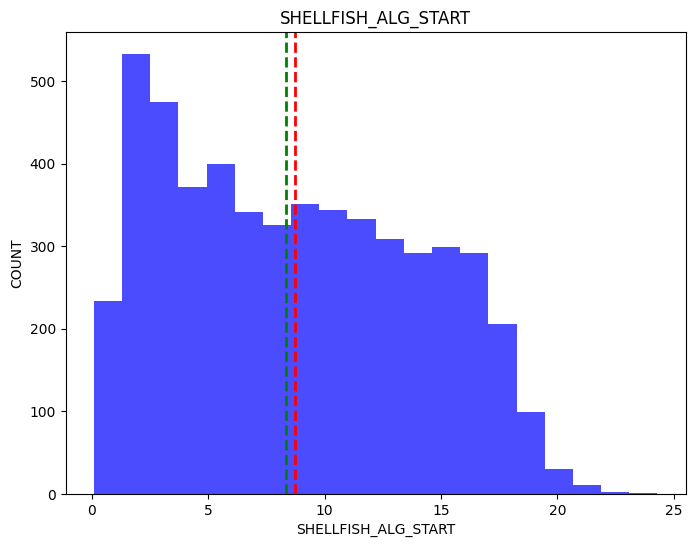

In [15]:
# Better graph creation than above cell.
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
plt.hist(cleanedAllergyData['SHELLFISH_ALG_START'], bins=20, color='blue', alpha=0.7)
plt.axvline(cleanedAllergyData['SHELLFISH_ALG_START'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(cleanedAllergyData['SHELLFISH_ALG_START'].median(), color='green', linestyle='dashed', linewidth=2)
plt.title('SHELLFISH_ALG_START')
plt.xlabel('SHELLFISH_ALG_START')
plt.ylabel('COUNT')
plt.show()